# LOADING LIBRARIES

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import date
%matplotlib inline

# LOADING DATA

In [44]:
data = pd.read_csv('/Users/ewa_anna_szyszka/Desktop/weekly_in_situ_co2_mlo.csv')
data.head()

,date,CO2
0,29/03/1958,316.19
1,05/04/1958,317.31
2,12/04/1958,317.69
3,19/04/1958,317.58
4,26/04/1958,316.48


In [45]:
#____________   Preparing the data for Stan model   ____________ 

'''I am converting here data['date'] into the number of days that passed from the first measurement,
so later on I can create my Stan model using daily intervals'''

days = []

for i in data.date:
    year = int(i[6:10]) #indexing the year 
    month = int(i[3:5]) #indexing the month
    day = int(i[0:2]) #indexing the day
    
    first = date(1958,3,29)  #first date in the dataset 
    current = date(year,month,day) 
    
    delta = (current-first).days 
    days.append(delta)


In [46]:
#____________   Converting data['date'] into date time format   ____________ 

'''I will use this converted date time data in order to plot an overall trend'''

date_ = [] 

for i in data['date']:
    date_str = str(i)
    format_str = '%d/%m/%Y'
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    date_.append(datetime_obj)   

# OVERALL TREND

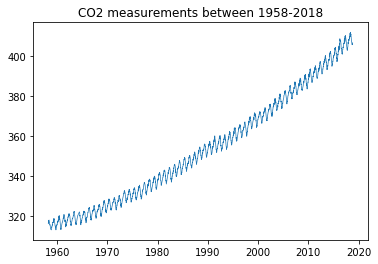

In [6]:
#____________   Overall trend   ____________ 

'''The plotted general trend revieled that the behavior of the overall trend is not linear, rather it is a 
transformation of a quadratic function'''

plt.plot(date_,data['CO2'],linewidth=0.7)
plt.title("CO2 measurements between 1958-2018")
plt.show()

# SEASONAL CHANGE

In [47]:
#____________   Plotting seasonal changes   ____________ 

''' Here we first will investigate the assumption that there is more CO2 consumption in winter 
and less in spring and summer. I will aim at both validating those assumptions here and assesing 
the shape of the seasonal fluctuations. I will look at yearly fluctuations in CO2 emmissions in 10 year ranges.'''


#________  Selecting data for 1960  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '1960-1-1') & (data['date'] <= '1960-12-31')
_1960 = data.loc[mask]
_1960 = _1960.sort_values(by='date') #sorting the dataframe by dates 

#________  Selecting data for 1970  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '1970-1-1') & (data['date'] <= '1970-12-31')
_1970 = data.loc[mask]
_1970 = _1970.sort_values(by='date') #sorting the dataframe by dates 


#________  Selecting data for 1980  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '1980-1-1') & (data['date'] <= '1980-12-31')
_1980 = data.loc[mask]
_1980 = _1980.sort_values(by='date') #sorting the dataframe by dates 

#________  Selecting data for 1990  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '1990-1-1') & (data['date'] <= '1990-12-31')
_1990 = data.loc[mask]
_1990 = _1990.sort_values(by='date') #sorting the dataframe by dates 

#________  Selecting data for 2000  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '2000-1-1') & (data['date'] <= '2000-12-31')
_2000 = data.loc[mask]
_2000 = _2000.sort_values(by='date') #sorting the dataframe by dates 


#________  Selecting data for 2010  ________  
data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '2010-1-1') & (data['date'] <= '2010-12-31')
_2010 = data.loc[mask]
_2010 = _2010.sort_values(by='date') #sorting the dataframe by dates 

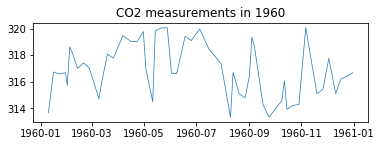

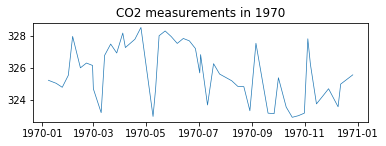

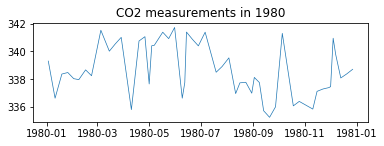

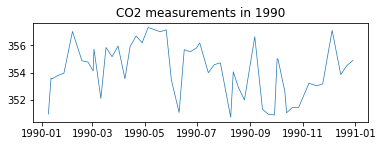

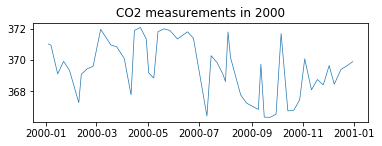

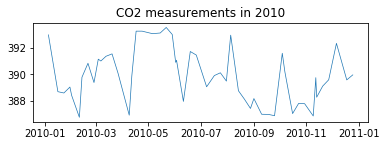

In [10]:
#____________   Plotting the yearly CO2 emmissions for six 10 year time intervals   ____________

'''The graphs plotted in a cell below show that the assumption that in winter the CO2 emission 
is higher and in summer and spring it drops is confirmed. Also, we notice that there is quite a 
lot of noise in the grahs below, thus one would need to take into consideration this difficulty 
during the decision process of the shape of the seasonal fluctuations.'''

plt.subplot(2, 1, 2)
plt.plot(_1960['date'],_1960['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 1960")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_1970['date'],_1970['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 1970")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_1980['date'],_1980['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 1980")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_1990['date'],_1990['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 1990")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_2000['date'],_2000['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 2000")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_2010['date'],_2010['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 2010")
plt.show()

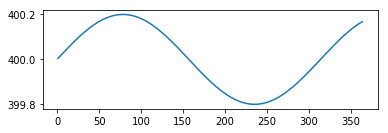

In [49]:
#____________   Plotting seasonal trend   ____________ 

'''Below, I plotted a reference graph of a sine function, which would be the approximate fit of 
the trends in data above. I will further test whether this is a good approximation of the 
seasonal trends below using the averaged monthly data.'''

plt.subplot(2, 1, 2)
x = np.arange(1,365,1)
y = 0.2*np.sin(0.02*ix)+400
plt.plot(x,y)
plt.show()

In [12]:
#____________   Re-creating the seasonal trend plot for averaged data   ____________ 

'''esting my shape assumption by taking a random year (1960) and taking the average for each month 
and plotting the averages from each month to be able to deterine whether my shape assumption is correct'''

_1960_jan = (_1960['date'] >= '1960-1-1') & (_1960['date'] <= '1960-1-31')
_1960_feb = (_1960['date'] >= '1960-2-1') & (_1960['date'] <= '1960-2-29')
_1960_mar = (_1960['date'] >= '1960-3-1') & (_1960['date'] <= '1960-3-30')
_1960_apr = (_1960['date'] >= '1960-4-1') & (_1960['date'] <= '1960-4-30')
_1960_may = (_1960['date'] >= '1960-5-1') & (_1960['date'] <= '1960-5-30')
_1960_jun = (_1960['date'] >= '1960-6-1') & (_1960['date'] <= '1960-6-30')
_1960_jul = (_1960['date'] >= '1960-7-1') & (_1960['date'] <= '1960-7-30')
_1960_aug = (_1960['date'] >= '1960-8-1') & (_1960['date'] <= '1960-8-30')
_1960_sep = (_1960['date'] >= '1960-9-1') & (_1960['date'] <= '1960-9-30')
_1960_oct = (_1960['date'] >= '1960-10-1') & (_1960['date'] <= '1960-10-30')
_1960_nov = (_1960['date'] >= '1960-11-1') & (_1960['date'] <= '1960-11-30')
_1960_dec = (_1960['date'] >= '1960-12-1') & (_1960['date'] <= '1960-12-30')

jan = _1960.loc[_1960_jan]
feb = _1960.loc[_1960_feb]
mar = _1960.loc[_1960_mar]
apr = _1960.loc[_1960_apr]
may = _1960.loc[_1960_may]
jun = _1960.loc[_1960_jun]
jul = _1960.loc[_1960_jul]
aug = _1960.loc[_1960_aug]
sep = _1960.loc[_1960_sep]
Oct = _1960.loc[_1960_oct]
nov = _1960.loc[_1960_nov]
dec = _1960.loc[_1960_dec]

jan = np.mean(jan['CO2'])
feb = np.mean(feb['CO2'])
mar = np.mean(mar['CO2'])
apr = np.mean(apr['CO2'])
may = np.mean(may['CO2'])
jun = np.mean(jun['CO2'])
jul = np.mean(jul['CO2'])
aug = np.mean(aug['CO2'])
sep = np.mean(sep['CO2'])
Oct = np.mean(Oct['CO2'])
nov = np.mean(nov['CO2'])
dec = np.mean(dec['CO2'])

co2 = [jan,feb,mar,apr,may, jun, jul, aug, sep, Oct, nov, dec]
months = [1,2,3,4,5,6,7,8,9,10,11,12]

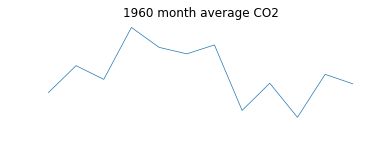

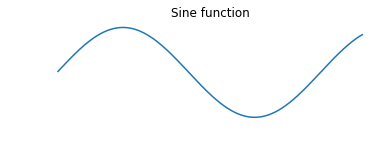

In [13]:
#____________   Sine function versus averaged seasonal trends data   ____________ 

'''Below I plot the averaged data for 1960 and the sine function and I reach conclusion that 
sine function would be the appropriate choice for the seasonal trends.'''

plt.subplot(2, 1, 2)
plt.plot(months,co2,linewidth=0.7)
plt.axis('off')
plt.title('1960 month average CO2')
plt.show()

plt.subplot(2, 1, 2)
ix = np.arange(1,365,1)
y = 0.2*np.sin(0.02*ix)+400
plt.plot(ix,y)
plt.axis('off')
plt.title('Sine function')
plt.show()

# STAN MODEL

In [14]:
stan_data = {
    'N':3091, #Total number of measurements in a dataset 
    'co2': data['CO2'], #actual CO2 measurements data
    'days': days, #Converted data['date'] into the number of days that passed from the first measurement
}

In [51]:
stan_code_1 = """

//Known data 

data {
    int<lower=1> N;  // number of datapoints
    real<lower=0> co2[N];  // C02 concentration data
    real<lower=0> days[N]; // Converted data['date']
}

//Unknown data - Parameters 

parameters {
    real<lower=0> c1;
    real<lower=0> c2;
    real<lower=0> a; //a - determines how stretched horizontally our function is
    real<lower=0> c4;
    
}

//The model follows the functional form of the quadratic function: ax^2 +bx + c
//days[j] 

model { 
    
    c1 ~ gamma(100,0.3); //this is the intercept of y which need to be around the value 316.19 
    c2 ~ normal(0.01,0.01); //linear term intercept 
    a ~ normal(0.01,0.01);
    c4 ~ cauchy(1,1); //noise 
    
    for (j in 1:N){
    
      co2[j] ~ normal( c2*days[j]+ a*(days[j])^2 + c1, c4); 
    }
    
}

generated quantities{
  real predicted_co2_values[N];
  for(j in 1:N){
    predicted_co2_values[j] = normal_rng(c1 + c2*days[j]+ a*(days[j])^2 , c4) ; 
    // This is our posterior predictive distribution
    }

}

"""

In [52]:
import pystan
stan_model = pystan.StanModel(model_code=stan_code_1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0e5ccb1070bc10708564279ec5e50577 NOW.
/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/wq/333f_hfn6d998n4_jwddvpqc0000gn/T/tmpj0w6suq4/stanfit4anon_model_0e5ccb1070bc10708564279ec5e50577_7039214612633134637.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [19]:
stan_results = stan_model.sampling(data=stan_data)

/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [22]:
print(stan_results.stansummary(pars=['c1','c2','a','c4']))

Inference for Stan model: anon_model_38f731813bcc8b0a18253104ad1ece3a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

     mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c1 314.49  3.3e-3   0.12 314.25 314.41 314.49 314.58 314.73   1427    1.0
c2 2.1e-3  7.6e-7 2.5e-5 2.1e-3 2.1e-3 2.1e-3 2.1e-3 2.2e-3   1135    nan
c3 9.6e-8 3.3e-11 1.1e-9 9.4e-8 9.5e-8 9.6e-8 9.7e-8 9.8e-8   1145    nan
c4   2.24  7.4e-4   0.03   2.19   2.22   2.24   2.26    2.3   1425    1.0

Samples were drawn using NUTS at Mon Dec 17 21:22:21 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [23]:
posterior = stan_results.extract()
post_predictive = posterior['predicted_co2_values']

In [24]:
predictive_means = []

for i in range(0,3091):
    predictive_means.append(np.mean(post_predictive[:,i]))

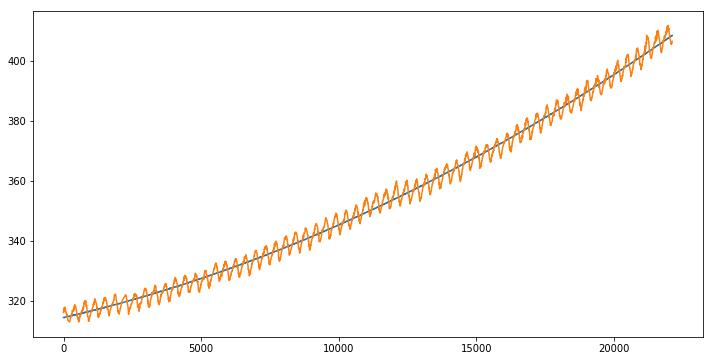

In [26]:
x = days
y1 = predictive_means
y2 = data['CO2']

plt.figure(figsize=(12,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

# seasonal and noise

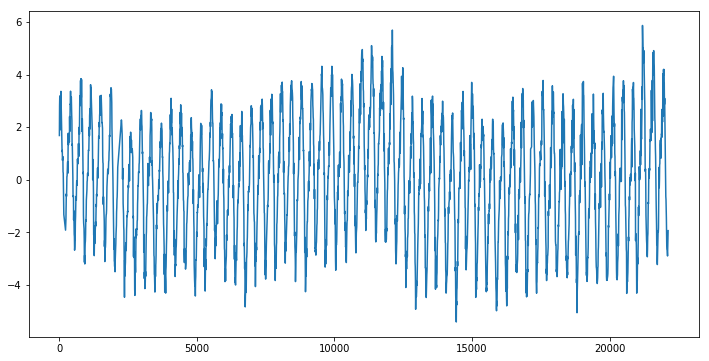

In [28]:
residuals = []
for i in range(0,3091):
    residuals.append(y2[i]-y1[i])

plt.figure(figsize=(12,6))
plt.plot(x,residuals)
plt.show()

In [34]:
stan_data_2 = {
    'N':3091,
    'residuals': residuals,
    'days': days,
    'period': 365.25
    
}

stan_code_2 = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {
    int<lower=1> N;  // number of datapoints
    real residuals[N];  // C02 concentration data
    real<lower=0> days[N];
    real<lower=0> period;
    
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.

parameters {
    real<lower=0> c1; //amplitude
    real<lower=0> c2; // noise
    real<lower=0> phi; // c1*sin(phi) will be the intercept
    
}


// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model { 
    c1 ~ normal(3,0.5);
    c2 ~ cauchy(2,1); //mean of noise, sd for noise
    
    for (j in 1:N){
    
      residuals[j] ~ normal(c1*sin(2*pi()*days[j]/period + phi), c2); 
    }
    
}

generated quantities{
  real predicted_residuals[N];
  for(j in 1:N){
    predicted_residuals[j] = normal_rng(c1*sin(2*pi()*days[j]/period + phi), c2) ; 
    // This is our posterior predictive distribution
    }

}

"""

In [35]:
stan_model_2 = pystan.StanModel(model_code=stan_code_2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e398dbe51f058e61560abb2c342703b1 NOW.
/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/wq/333f_hfn6d998n4_jwddvpqc0000gn/T/tmpwhmhu2e3/stanfit4anon_model_e398dbe51f058e61560abb2c342703b1_9162882302838285594.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [36]:
stan_results_2 = stan_model_2.sampling(data=stan_data_2)
print(stan_results_2.stansummary(pars=['c1','c2','phi']))

Inference for Stan model: anon_model_e398dbe51f058e61560abb2c342703b1.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

      mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c1    2.86  4.0e-4   0.03   2.81   2.84   2.86   2.87   2.91   4000    1.0
c2    0.97  1.9e-4   0.01   0.95   0.96   0.97   0.98    1.0   4000    1.0
phi   1.15  1.4e-4 9.0e-3   1.14   1.15   1.15   1.16   1.17   4000    1.0

Samples were drawn using NUTS at Mon Dec 17 21:46:33 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [38]:
posterior_2 = stan_results_2.extract()
post_predictive_2 = posterior_2['predicted_residuals']

predictive_residuals = []  #taking the mean values of the predicted from posterior

for i in range(0,3091):
    predictive_residuals.append(np.mean(post_predictive_2[:,i]))

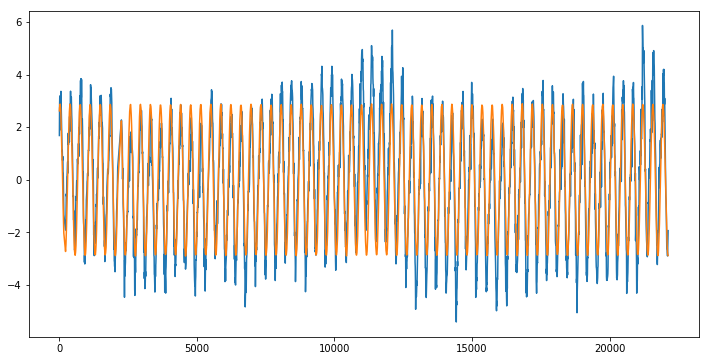

In [40]:
y3 = predictive_residuals
y4 = residuals

plt.figure(figsize=(12,6))
plt.plot(x,y4)
plt.plot(x,y3)
plt.show()

# noise

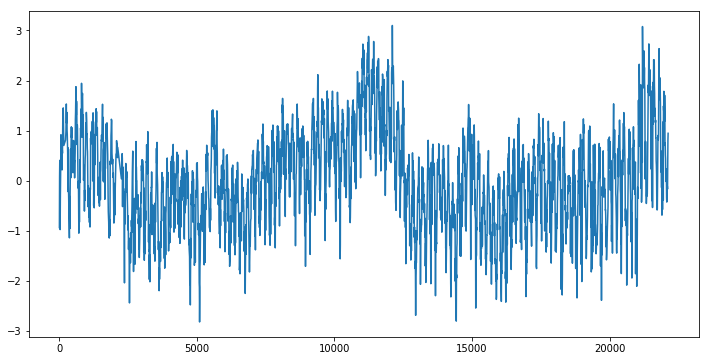

In [41]:
noise = []
for i in range(0,3091):
    noise.append(y4[i]-y3[i])

plt.figure(figsize=(12,6))
plt.plot(x,noise)
plt.show()

In [54]:
## Now update the days list to have another 40 years for the future. The first 3091 values (=N) will still correspond to the original prediction. The values after that will correspond to future predictions

# N_future = N + (days for 40 years)

# Update days here such that days becomes a list of N_future number of days instead of N

from datetime import timedelta

final_day = days[3090]
# For every loop, add 7 to the last entry and append it
# new_day = final_day + 7
# days.append(new_day)
final = date(2018,10,27)
next_date = final + timedelta(days = 7)
print(final_day)

22127


In [ ]:
stan_data = {
    'N':3091, #Total number of measurements in a dataset
    'N_future': len(days), #Total number of measurements in a dataset 
    'co2': data['CO2'], #actual CO2 measurements data
    'days': days, #Converted data['date'] into the number of days that passed from the first measurement
}

stan_code_1 = """

//Known data 

data {
    int<lower=1> N;  // number of datapoints
    int<lower=1> N_future;
    real<lower=0> co2[N];  // C02 concentration data
    real<lower=0> days[N_future]; // Converted data['date']
}

//Unknown data - Parameters 

parameters {
    real<lower=0> c1;
    real<lower=0> c2;
    real<lower=0> c3; //a - determines how stretched horizontally our function is
    real<lower=0> c4;
    
}

//The model follows the functional form of the quadratic function: ax^2 +bx
//days[j] 

model { 
    
    c1 ~ gamma(100,0.3); //this is the intercept of y which need to be around the value 316.19 
    c2 ~ normal(0.01,0.01); //linear term intercept 
    c3 ~ normal(0.01,0.01);
    c4 ~ cauchy(1,1);
    
    for (j in 1:N){
    
      co2[j] ~ normal( c2*days[j]+ c3*(days[j])^2 + c1, c4); 
    }
    
}

generated quantities{
  real predicted_co2_values[N_future];
  for(j in 1:N_future){
    predicted_co2_values[j] = normal_rng(c1 + c2*days[j]+ c3*(days[j])^2 , c4) ; 
    // This is our posterior predictive distribution
    }

}

"""